In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [ ]:
df = pd.read_csv("features/features_training.csv")

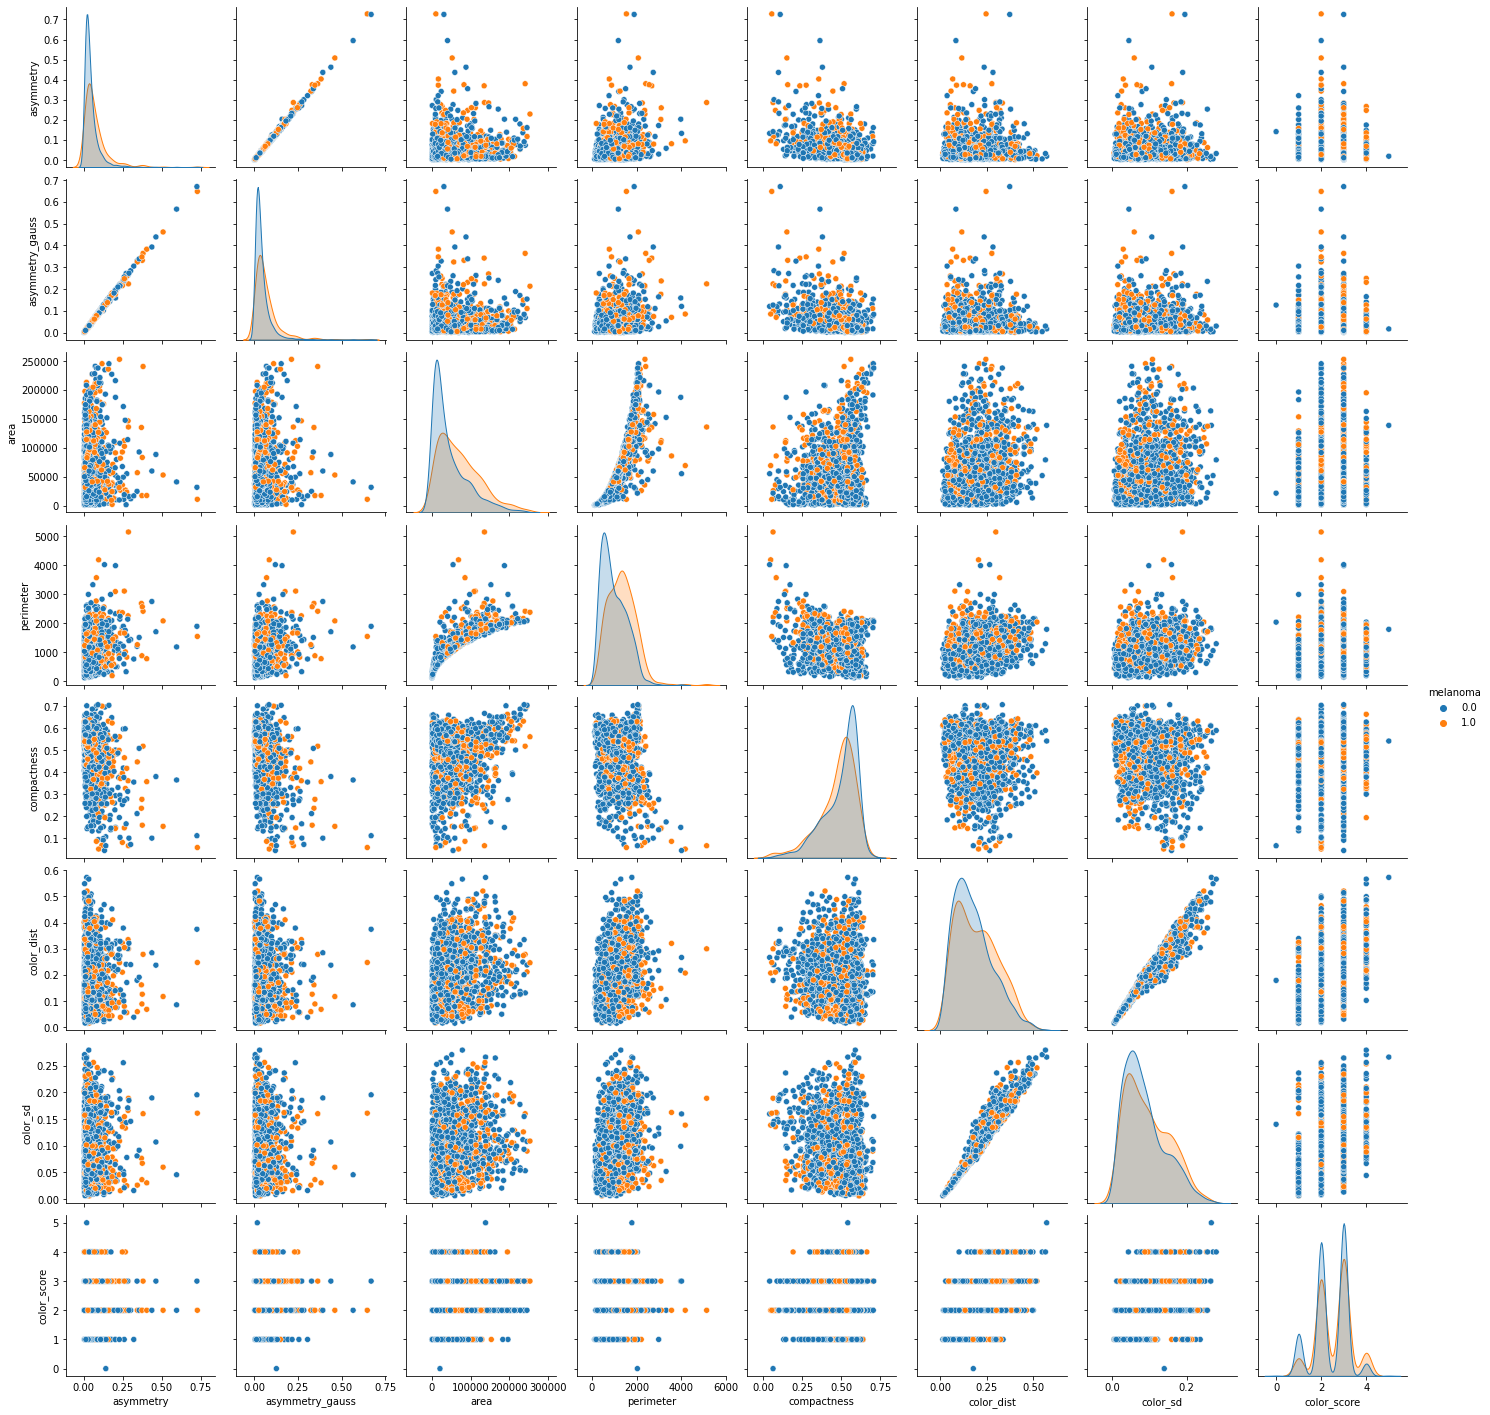

In [ ]:
sns.pairplot(data=df, hue="melanoma", diag_kind="kde", diag_kws={"common_norm": False})

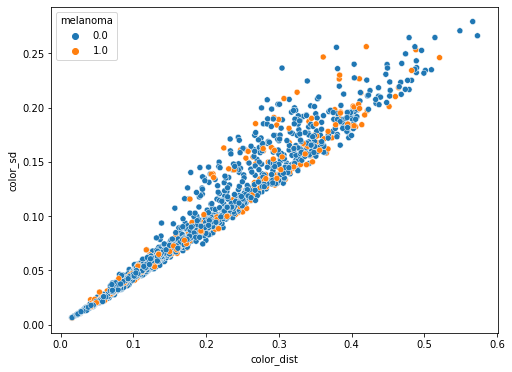

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x="color_dist", y="color_sd", hue="melanoma", data=df, ax=ax);

In [ ]:
pearsonr(df["color_dist"], df["color_sd"])

(0.976579145478442, 0.0)

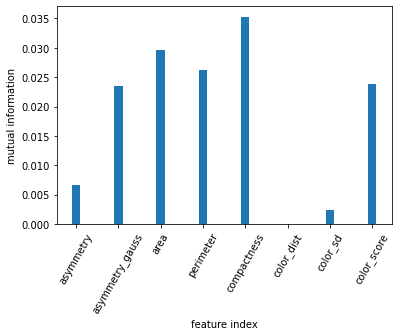

In [ ]:
df = pd.read_csv("features/features.csv")
X = df.drop(["image_id", "melanoma"], axis=1)
y = df["melanoma"]
feature_names = [
    "asymmetry",
    "asymmetry_gauss",
    "area",
    "perimeter",
    "compactness",
    "color_dist",
    "color_sd",
    "color_score",
]
selector = SelectKBest(mutual_info_classif, k=4)
selector.fit(X, y)

# Show the feature scores
scores = selector.scores_


fig, ax = plt.subplots()
ax.bar(feature_names, scores, width=.2)
ax.set_xlabel('feature index')
ax.set_ylabel('mutual information')
plt.xticks(rotation=60);

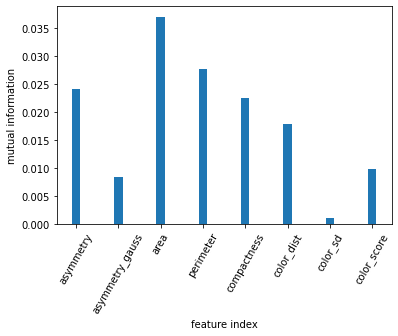

In [ ]:
from sklearn.feature_selection import chi2
df = pd.read_csv("features/features_training.csv")
X = df.drop(["image_id", "melanoma"], axis=1)
y = df["melanoma"]
feature_names = [
    "asymmetry",
    "asymmetry_gauss",
    "area",
    "perimeter",
    "compactness",
    "color_dist",
    "color_sd",
    "color_score",
]
selector = SelectKBest(mutual_info_classif, k=2)
selector.fit(X, y)

# Show the feature scores
scores = selector.scores_


fig, ax = plt.subplots()
ax.bar(feature_names, scores, width=.2)
ax.set_xlabel('feature index')
ax.set_ylabel('mutual information')
plt.xticks(rotation=60);

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("features/features_training.csv")
features = ["asymmetry", "area", "perimeter", "compactness", "color_dist", "color_score"]
x = df[features].to_numpy()
y = np.array(df["melanoma"])

n_splits = 5
kf = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.4, random_state=1)

acc_val_knn = np.empty((n_splits, 1))
auc_val_knn = np.empty((n_splits, 1))
acc_val_tree = np.empty((n_splits, 1))
auc_val_tree = np.empty((n_splits, 1))

k = 5

for i, (train_index, val_index) in enumerate(kf.split(x, y)):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]

    clf = KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(x_train, y_train)
    y_pred_val = clf.predict(x_val)
    
    acc_val_knn[i] = accuracy_score(y_val, y_pred_val)
    auc_val_knn[i] = roc_auc_score(y_val, y_pred_val)

    clf = DecisionTreeClassifier(random_state=1)
    clf.fit(x_train, y_train)
    y_pred_val = clf.predict(x_val)

    acc_val_tree[i] = accuracy_score(y_val, y_pred_val)
    auc_val_tree[i] = roc_auc_score(y_val, y_pred_val)
    

print("KNN Accuracy scores")
print("acc_score:", np.mean(acc_val_knn))
print("auc_score:", np.mean(auc_val_knn))
print("_"*30)
print("Decision Tree Accuracy scores")
print("acc_score:", np.mean(acc_val_tree))
print("auc_score:", np.mean(auc_val_tree))

KNN Accuracy scores
acc_score: 0.78675
auc_score: 0.5303076923076924
______________________________
Decision Tree Accuracy scores
acc_score: 0.709
auc_score: 0.5368205128205129


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6840a14b-d41a-45b9-abd0-892354334cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>